# Time series smoothing via least squares

- this notebook follows course notes `optimization-for-ml.pdf`
- noisy observations at regular interval, $b \in \mathbf{R}^m$ (discritized curve)
- don't have a model for the curve (linear, polynomial, ...)
- do know the the curve should be "smooth"
- idea: find $\beta \in \mathbf{R}^m$ which is close to $b$, but also penalized for being nonsmooth

# "smoothness"
- roughly define smoothness to be a curve which does not change slope much
- change in slope (of a smooth curve) given by the second derivative
- change in slope of a discretized curve given by the second-order differences, $Dx$, where
$$
D = \begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & &&0 \\
0 & 1  & -2 & 1 & 0 & \ldots & &0\\
0 & 0 &1 & -2 & -1 & 0 & \ldots & 0 \\
\vdots &
\end{pmatrix}
$$

# model
- $\beta$ close to the data if $\|\beta-b\|_2^2$ is small
- $\beta$ is smooth if $\|D\beta\|_2^2$ is small
- solve the least-squares problem
$$
\begin{array}{ll}
\mbox{minimize}_\beta & \|\beta-b\|_2^2 + \rho \|D\beta\|_2^2
\end{array}
$$
- $\rho$ trades-off between fidelity to the data and smoothness


In [0]:
# python setup
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plot properties
# use to create figures for tex
plt.rc('font', family='serif')
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

In [0]:
# Construct kth order difference matrix with shape (n-k, n) 
def diff(n, k=1):
    D = np.diag(-1*np.ones(n)) + np.diag(np.ones(n-1),1)
    D = D[:-1,:]
    if k > 1:
        return diff(n-1,k-1).dot(D)
    else:
        return D

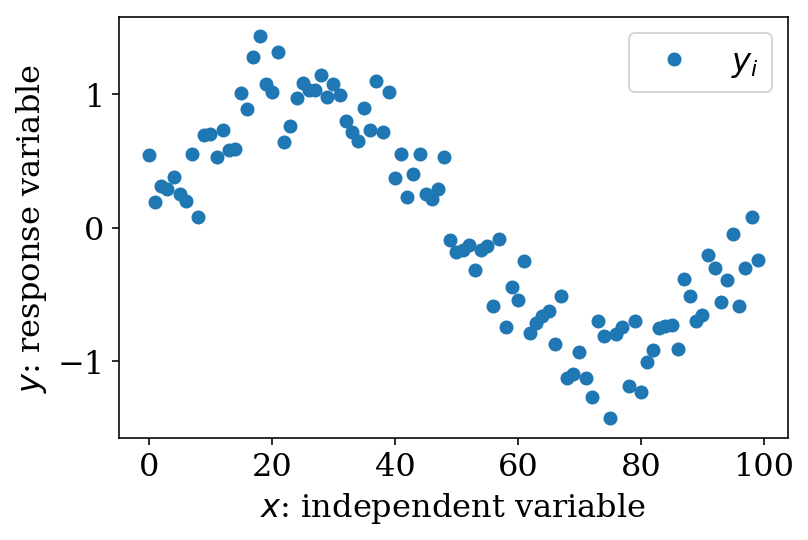

In [3]:
# generate and plot data
np.random.seed(101)
n = 100
# get second-order difference matrix
D = diff(n, 2)
x = np.linspace(0, 2*np.pi, n)
b = np.sin(x)
b = b + np.random.randn(n)*.2

plt.figure()
plt.plot(b,'o',label='$y_i$')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend()
plt.gcf().subplots_adjust(bottom=0.15)

# $\rho = 1$

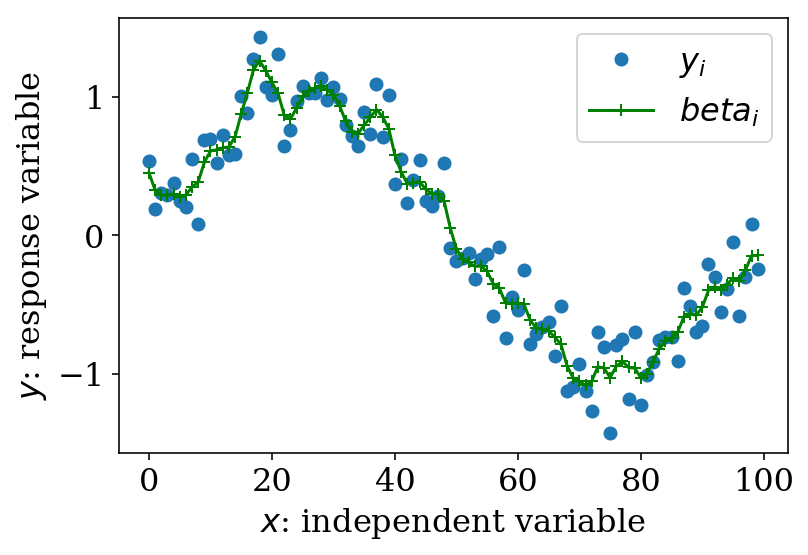

In [4]:
rho = 1
# construct and solve problem in cvxpy
beta = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(beta-b)
                         +rho*cvx.sum_squares(D*beta))).solve()
beta = np.array(beta.value).flatten()

plt.figure()
plt.plot(b,'o',label='$y_i$')
plt.plot(beta,'g+-',label='$beta_i$')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend()

# $\rho = 10$

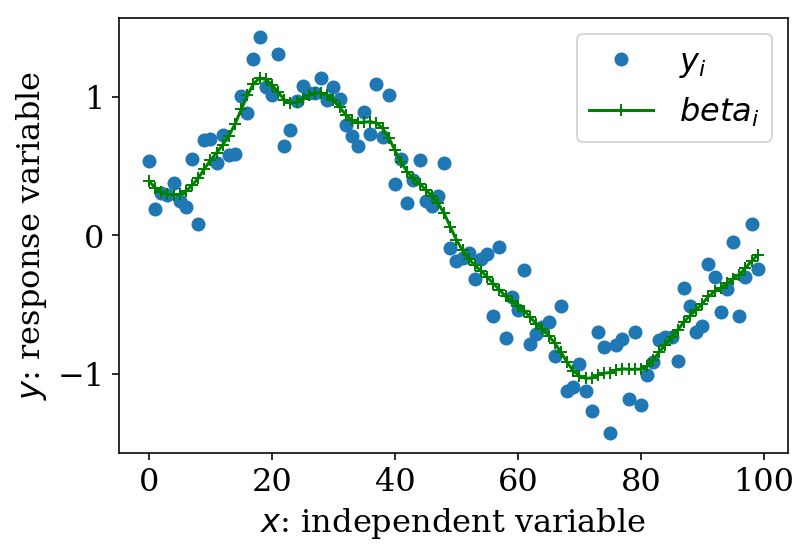

In [5]:
rho = 10

beta = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(beta-b) + rho*cvx.sum_squares(D*beta))).solve()
beta = np.array(beta.value).flatten()

plt.figure()
plt.plot(b,'o',label='$y_i$')
plt.plot(beta,'g+-',label='$beta_i$')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend()

# $\rho = 1000$

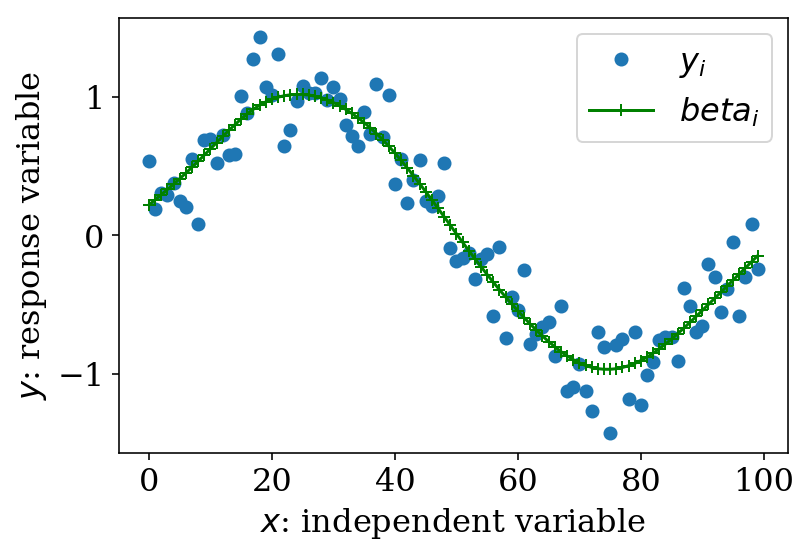

In [6]:
rho = 1000

beta = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(beta-b) + rho*cvx.sum_squares(D*beta))).solve()
beta = np.array(beta.value).flatten()

plt.figure()
plt.plot(b,'o',label='$y_i$')
plt.plot(beta,'g+-',label='$beta_i$')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend()